# Projet 4 : **Anticiper le retard de vols des avions**

## **1.Libraries**

In [1]:
#!pip install feature_engine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from os import listdir
import glob
import missingno as msno
from feature_engine.categorical_encoders import OneHotCategoricalEncoder


## **2.Data Set**

In [2]:
df_model = pd.read_csv('04_data_model_final.csv')
df_model = df_model.drop(['Unnamed: 0'], axis=1)
df_model.head()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY,CARRIER_AA,CARRIER_UA,CARRIER_WN,CARRIER_EV,...,CRS_DEP_TIME_7,CRS_DEP_TIME_9,CRS_DEP_TIME_13,CRS_DEP_TIME_6,CRS_DEP_TIME_1,CRS_DEP_TIME_8,CRS_DEP_TIME_23,CRS_DEP_TIME_0,CRS_DEP_TIME_3,CRS_DEP_TIME_2
0,0,0,31,0,0,-3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,41,0,0,39,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,0,2,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,14,0,17,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,18,0,0,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_model.shape

(13645, 633)

## **3.Flights Delay Models**


### **3.0 Modelisation Libraries**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [5]:
sc = StandardScaler()
df_num_sc = sc.fit_transform(df_model.loc[:, ['CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
                                              'LATE_AIRCRAFT_DELAY']])
                                              
                                              
                                              
                                             
df_num_sc= pd.DataFrame(df_num_sc)
df_num_sc.columns = ['CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
                                              
                                              
                     
                                              

df_model_1=df_model.drop(df_model[['CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']], axis=1)
                                   
                                 

df_model_sc=pd.concat([df_num_sc, df_model_1], axis=1)
df_model_sc.head()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY,CARRIER_AA,CARRIER_UA,CARRIER_WN,CARRIER_EV,...,CRS_DEP_TIME_7,CRS_DEP_TIME_9,CRS_DEP_TIME_13,CRS_DEP_TIME_6,CRS_DEP_TIME_1,CRS_DEP_TIME_8,CRS_DEP_TIME_23,CRS_DEP_TIME_0,CRS_DEP_TIME_3,CRS_DEP_TIME_2
0,-0.720957,-0.065652,1.835812,-0.026497,-0.773717,-3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.741342,-0.065652,2.683872,-0.026497,-0.773717,39,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.054581,-0.065652,-0.623562,-0.026497,-0.773717,20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.720957,-0.065652,0.394110,-0.026497,0.056031,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.877027,-0.065652,-0.793174,-0.026497,-0.773717,20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#df_model_sc.to_csv('05_data_model_final_sc.csv')

### 3.1 Multiple Linear Regression

In [7]:
def train_cross_val(cols):

    features = df_model_sc[cols]
    target = df_model_sc['DEP_DELAY']

    r2_values = []
    rmse_values = []
    variance_values =  []

    #KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=3)

    #itérer à travers chaque fold
    for train_index, test_index in kf.split(df_model_sc):

        #sets de training et de tests
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        #Adapter le modèle et faire des prédictions 
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)

        #Calculer les valeurs r2, rmse et variances
        R2 = r2_score(y_test, predictions)
        RMSE = np.sqrt(mean_squared_error(y_test, predictions))
        Variance = np.var(predictions)

        #Ajouter aux listes pour calculer la moyenne globale des métriques
        r2_values.append(R2)
        rmse_values.append(RMSE)
        variance_values.append(Variance)

    #Calculer la moyenne des métriques 
    avg_R2_lr = np.mean(r2_values)
    avr_RMSE_lr = np.mean(rmse_values)
    avr_Var_lr = np.mean(variance_values)

    return(avg_R2_lr, avr_RMSE_lr, avr_Var_lr)    

In [8]:
R2_0, RMSE_0, Var_0 = train_cross_val(df_model_sc.columns.drop(['DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 
                                                          'LATE_AIRCRAFT_DELAY']))                                 
print('Var_Without_Delay:', R2_0, RMSE_0, Var_0)

R2_1, RMSE_1, Var_1 = train_cross_val(df_model_sc.columns.drop(['DEP_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']))
print('Var_CARRIER_Delay:', R2_1, RMSE_1, Var_1)

R2_2, RMSE_2, Var_2 = train_cross_val(df_model_sc.columns.drop(['DEP_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']))                      
print('Var_CARRIER_WEATHER_DELAY_Delay:', R2_2, RMSE_2, Var_2)

R2_3, RMSE_3, Var_3 = train_cross_val(df_model_sc.columns.drop(['DEP_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']))                 
print('Var_CARRIER_WEATHER_NAS_Delay:', R2_3, RMSE_3, Var_3)

R2_4, RMSE_4, Var_4 = train_cross_val(df_model_sc.columns.drop(['DEP_DELAY', 'LATE_AIRCRAFT_DELAY']))                             
print('Var_CARRIER_WEATHER_NAS_SECURITY_Delay:', R2_4, RMSE_4, Var_4)

R2_5, RMSE_5, Var_5 = train_cross_val(df_model_sc.columns.drop(['DEP_DELAY']))                         
print('Var_CARRIER_WEATHER_NAS_SECURITY_LATE_AIRCRAFT_Delay:', R2_5, RMSE_5, Var_5)

Var_Without_Delay: -8.379190988899285e+22 6525900292695.685 5.034216076724611e+25
Var_CARRIER_Delay: -2.2068221903547347e+19 93366778737.6715 1.3400611220950985e+22
Var_CARRIER_WEATHER_DELAY_Delay: -3.670876467814352e+20 250243514284.41504 2.237339354687517e+23
Var_CARRIER_WEATHER_NAS_Delay: -5.604414508119397e+19 143228710428.3677 3.336489443525986e+22
Var_CARRIER_WEATHER_NAS_SECURITY_Delay: -8.235229286257666e+18 50245015147.03644 4.792898516081067e+21
Var_CARRIER_WEATHER_NAS_SECURITY_LATE_AIRCRAFT_Delay: -2.012772873182787e+18 29769992107.196693 1.2019893556255696e+21


### **3.2 PCA and MLR**

In [9]:
#Data for models
X_models = df_model_sc.drop(['DEP_DELAY', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1).values
y_models = df_model_sc['DEP_DELAY'].values

In [10]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split (X_models, y_models, test_size = 0.25)

In [11]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_1)
X_test_pca = pca.fit_transform(X_test_1)

In [12]:
pcs = pca.components_

In [13]:
var = pca.explained_variance_ratio_

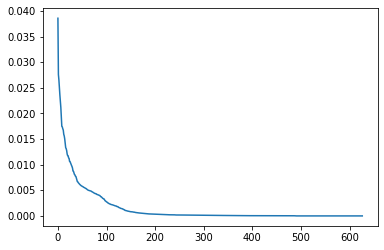

In [14]:
plt.plot(var)
plt.draw()

In [15]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

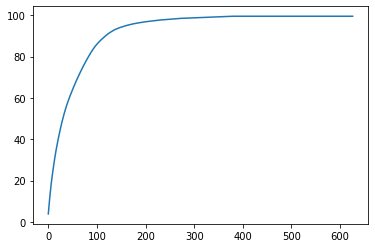

In [17]:
plt.plot(var1)
plt.draw()
#200 compotents explain ~ 95% of information

In [18]:
pca = PCA(n_components=200)
X_train_pca_200 = pca.fit_transform(X_train_1)
X_test_pca_200 = pca.fit_transform(X_test_1)

In [19]:
# MLR with PCA
from  sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

lr = LinearRegression()
#kf = KFold(10, shuffle=True, random_state=1)
r2 = cross_val_score(lr, X_train_pca_200, y_train_1, cv=5)
mses = cross_val_score(lr, X_train_pca_200, y_train_1, scoring = 'neg_mean_absolute_error', cv=5)
rmses = np.sqrt(np.absolute(mses))

print('R2_cv :', r2)
print('R2_cv_Mean :', np.mean(r2))
print('RMSES_cv :', rmses)
print('RMSE_cv_Mean :', rmses.mean())
print('RMSE_cv_std:', rmses.std())

lr.fit(X_train_pca_200, y_train_1)
y_true, y_pred = y_test_1, lr.predict(X_test_pca_200)

r2_pca_lr = r2_score(y_true, y_pred) 
rmse_pca_lr = np.sqrt(mean_squared_error(y_true, y_pred))

print("R_squared_pca_lr: {}".format(r2_pca_lr))
print("RMSE_pca_lr : {}".format(rmse_pca_lr))

R2_cv : [0.05898457 0.05638233 0.04873087 0.06374611 0.04117636]
R2_cv_Mean : 0.05380404986495883
RMSES_cv : [4.35970915 4.34179113 4.37316295 4.36603439 4.37766616]
RMSE_cv_Mean : 4.36367275324775
RMSE_cv_std: 0.012537720364760235
R_squared_pca_lr: -0.07544832578160543
RMSE_pca_lr : 24.831504800838758


### **3.3 Ridge Regression**

In [20]:
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split (X_models, y_models, test_size = 0.25)
X_train_RL.shape, X_test_RL.shape

((10233, 627), (3412, 627))

In [19]:
from sklearn.linear_model import Ridge
n_alpahs = 50
alphas = np.logspace(-5, 5, 50)
reg_ridge =  Ridge()
coefs = []
errors = []
for a in alphas:
    reg_ridge.set_params(alpha=a)
    reg_ridge.fit(X_train_RL, y_train_RL)
    coefs.append(reg_ridge.coef_)
    errors.append(np.mean((reg_ridge.predict(X_test_RL) - y_test_RL) ** 2))

<function matplotlib.pyplot.show(*args, **kw)>

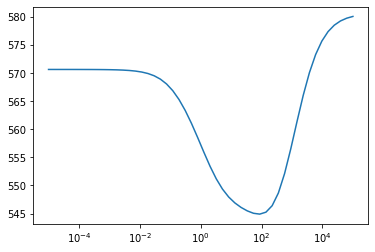

In [20]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.show

In [21]:
print(np.argmin(errors))

34


In [22]:
print(np.sqrt(errors[np.argmin(errors)]))

23.34334289518614


In [23]:
print(alphas[34])

86.85113737513521


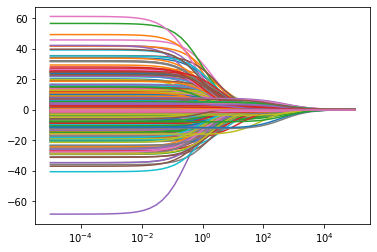

In [24]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

### **3.4 Lasso Regression**

In [25]:
from sklearn.linear_model import Lasso
n_alpahs = 50
alphas = np.logspace(-5, 5, 50)
reg_lasso =  Lasso()
coefs = []
errors = []
for a in alphas:
    reg_lasso.set_params(alpha=a)
    reg_lasso.fit(X_train_RL, y_train_RL)
    coefs.append(reg_lasso.coef_)
    errors.append(np.mean((reg_lasso.predict(X_test_RL) - y_test_RL) ** 2))

C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.

<function matplotlib.pyplot.show(*args, **kw)>

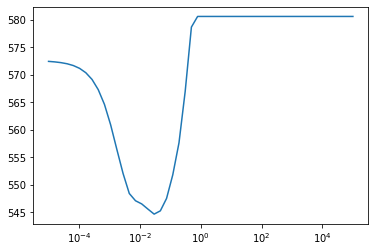

In [26]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.show

In [27]:
print(np.argmin(errors))

17


In [28]:
print(np.sqrt(errors[np.argmin(errors)]))

23.33735186649792


In [29]:
print(alphas[17])

0.029470517025518096


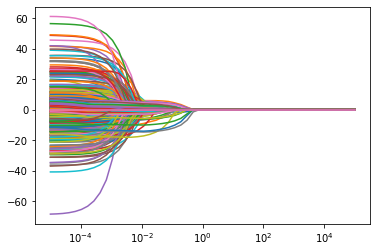

In [30]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

### 3.5 Ridge Regression with Cross Validation 

In [39]:
from sklearn.linear_model import Ridge
reg_ridge =  Ridge()
params = {'alpha':np.logspace(-5,5,20)}
gscv_reg_ridge=GridSearchCV(reg_ridge,params,cv=5)
gscv_reg_ridge.fit(X_train_RL, y_train_RL)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-05, 3.35982e-05, 1.12884e-04, 3.79269e-04, 1.27427e-03,
       4.28133e-03, 1.43845e-02, 4.83293e-02, 1.62378e-01, 5.45559e-01,
       1.83298e+00, 6.15848e+00, 2.06914e+01, 6.95193e+01, 2.33572e+02,
       7.84760e+02, 2.63665e+03, 8.85867e+03, 2.97635e+04, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
print(gscv_reg_ridge.best_params_)
print(gscv_reg_ridge.best_score_)

{'alpha': 69.51927961775606}
0.06502401524454975


In [41]:
y_pred_ridge = gscv_reg_ridge.predict(X_test_RL)

In [42]:
r2_rr = r2_score(y_test_RL, y_pred_ridge)
rmse_rr = np.sqrt(mean_squared_error(y_test_RL, y_pred_ridge))

In [43]:
print("R_squared_rr: {}".format(r2_rr))
print("RMSE_rr : {}".format(rmse_rr))

R_squared_rr: 0.06220797812256529
RMSE_rr : 23.696558590081587


### **3.6 Lasso Regression with Cross Validation**

In [45]:
from sklearn.linear_model import Lasso
reg_lasso =  Lasso()
params = {'alpha':np.logspace(-5,5,20)}
gscv_reg_lasso = GridSearchCV(reg_lasso, params,cv=5)
gscv_reg_lasso.fit(X_train_RL, y_train_RL)

C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-05, 3.35982e-05, 1.12884e-04, 3.79269e-04, 1.27427e-03,
       4.28133e-03, 1.43845e-02, 4.83293e-02, 1.62378e-01, 5.45559e-01,
       1.83298e+00, 6.15848e+00, 2.06914e+01, 6.95193e+01, 2.33572e+02,
       7.84760e+02, 2.63665e+03, 8.85867e+03, 2.97635e+04, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
print(gscv_reg_lasso.best_params_)
print(gscv_reg_lasso.best_score_)

{'alpha': 0.01438449888287663}
0.06600113396718518


In [47]:
y_pred_lasso = gscv_reg_lasso.predict(X_test_RL)

In [48]:
r2_lr = r2_score(y_test_RL, y_pred_lasso)
rmse_lr = np.sqrt(mean_squared_error(y_test_RL, y_pred_lasso))

In [49]:
print("R_squared_lr: {}".format(r2_lr))
print("RMSE_lr : {}".format(rmse_lr))

R_squared_lr: 0.06254827030394383
RMSE_lr : 23.692258870595555


### **3.7 Decision Tree**

In [50]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_models, y_models, test_size = 0.25)

In [51]:
from sklearn.tree import DecisionTreeRegressor
reg_DT =  DecisionTreeRegressor()
param_grid = {'min_samples_split':range(2, 22)}
gscv_reg_DT = GridSearchCV(reg_DT,param_grid,cv=5)
gscv_reg_DT.fit(X_train_DT, y_train_DT)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(2, 22)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
print(gscv_reg_DT.best_params_)
print(gscv_reg_DT.best_score_)

{'min_samples_split': 21}
-0.4440256676700397


In [53]:
y_pred_DT = gscv_reg_DT.predict(X_test_DT)

In [54]:
r2_dt = r2_score(y_pred_DT, y_test_DT)
rmse_dt = np.sqrt(mean_squared_error(y_pred_DT, y_test_DT))

In [55]:
print("R_squared_DT: {}".format(r2_dt))
print("RMSE_DT : {}".format(rmse_dt))

R_squared_DT: -1.2355757701484515
RMSE_DT : 28.964087829434852


### 3.8 Models test with delay variables

In [56]:
def reg_with_delay_vars():

    features = df_model_sc.drop(['DEP_DELAY'], axis=1).values
    target = df_model_sc['DEP_DELAY'].values

    X_train_delay, X_test_delay, y_train_delay, y_test_delay = train_test_split(features, target, test_size = 0.25)
    
    gscv_reg_ridge.fit(X_train_delay, y_train_delay)
    y_pred_rd_delay = gscv_reg_ridge.predict(X_test_delay)
    R2_rd_delay = r2_score(y_test_delay, y_pred_rd_delay)
    RMSE_rd_delay = np.sqrt(mean_squared_error(y_test_delay, y_pred_rd_delay))
    
    gscv_reg_lasso.fit(X_train_delay, y_train_delay)
    y_pred_ls_delay = gscv_reg_lasso.predict(X_test_delay)
    R2_ls_delay = r2_score(y_test_delay, y_pred_ls_delay)
    RMSE_ls_delay = np.sqrt(mean_squared_error(y_test_delay, y_pred_ls_delay))
       
    gscv_reg_DT.fit(X_train_delay, y_train_delay)
    y_pred_DT_delay = gscv_reg_DT.predict(X_test_delay)
    R2_DT_delay = r2_score(y_test_delay, y_pred_DT_delay)
    RMSE_DT_delay = np.sqrt(mean_squared_error(y_test_delay, y_pred_DT_delay))
    

    return(R2_rd_delay, RMSE_rd_delay, R2_ls_delay, RMSE_ls_delay, R2_DT_delay, RMSE_DT_delay)   

In [57]:
R2_rd_delay, RMSE_rd_delay, R2_ls_delay, RMSE_ls_delay, R2_DT_delay, RMSE_DT_delay = reg_with_delay_vars()
                                                                                                                                                                                                            
print('Ridge_All_Var:', R2_rd_delay, RMSE_rd_delay)
print('Lasso_All_Var:', R2_ls_delay, RMSE_ls_delay)
print('DT_All_Var:', R2_DT_delay, RMSE_DT_delay)

C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\sklearn\linear_model\coordinate_descent.

Ridge_All_Var: 0.8495174761923494 9.503271867867703
Lasso_All_Var: 0.8506453715242224 9.467590461153609
DT_All_Var: 0.8187206143567651 10.430480868502976


### 3.9 Final Model 

#### 3.9.1 Comparison and Selection (Without Delay Variables)

In [58]:
Models_comparison_without_delay = pd.DataFrame({'Linear Regression PCA':[r2_pca_lr,rmse_pca_lr],'Ridge Regression':[r2_rr,rmse_rr],'Lasso Regression':[r2_lr,rmse_lr],
                                                'Decision Tree Regression':[r2_dt, rmse_dt]}, index = ['R2','RMSE'])

In [59]:
Models_comparison_without_delay

,Linear Regression PCA,Ridge Regression,Lasso Regression,Decision Tree Regression
R2,-0.075448,0.062208,0.062548,-1.235576
RMSE,24.831505,23.696559,23.692259,28.964088


#### 3.9.2 Comparison and Selection (WithDelay Variables)

In [60]:
Models_comparison_with_delay = pd.DataFrame({'Ridge Regression_delay':[R2_rd_delay, RMSE_rd_delay],'Lasso Regression_delay':[R2_ls_delay, RMSE_ls_delay],
                                             'Decision Tree Regression_delay':[R2_DT_delay, RMSE_DT_delay]}, index = ['R2','RMSE'])

In [61]:
Models_comparison_with_delay

,Ridge Regression_delay,Lasso Regression_delay,Decision Tree Regression_delay
R2,0.849517,0.850645,0.818721
RMSE,9.503272,9.467590,10.430481


#### 3.9.3  Most important delay variables

In [62]:
def rd_reg(cols_delay):

    features = df_model_sc[cols_delay].values
    target = df_model_sc['DEP_DELAY'].values

    X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(features, target, test_size = 0.25)
    
    
    gscv_reg_ridge.fit(X_train_rd, y_train_rd)

    y_pred_rd = gscv_reg_ridge.predict(X_test_rd)

    R2_rd = r2_score(y_test_rd, y_pred_rd)
    RMSE_rd = np.sqrt(mean_squared_error(y_test_rd, y_pred_rd))

    return(R2_rd, RMSE_rd)   

In [63]:
#R2_rd_0, RMSE_rd_0 = rd_reg(df_model_sc.columns.drop(['DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                                                      #'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']))                                                                                       
#print('Without_Delay:', R2_rd_0, RMSE_rd_0)

R2_rd_1, RMSE_rd_1 = rd_reg(df_model_sc.columns.drop(['DEP_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
                                                      'LATE_AIRCRAFT_DELAY']))
print('CARRIER_Delay:', R2_rd_1, RMSE_rd_1)

R2_rd_2, RMSE_rd_2 = rd_reg(df_model_sc.columns.drop(['DEP_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']))                      
print('CARRIER_WEATHER_Delay:', R2_rd_2, RMSE_rd_2)

R2_rd_3, RMSE_rd_3 = rd_reg(df_model_sc.columns.drop(['DEP_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']))                 
print('CARRIER_WEATHER_NAS_Delay:', R2_rd_3, RMSE_rd_3)

R2_rd_4, RMSE_rd_4 = rd_reg(df_model_sc.columns.drop(['DEP_DELAY', 'LATE_AIRCRAFT_DELAY']))                             
print('CARRIER_WEATHER_NAS_SECURITY_Delay:', R2_rd_4, RMSE_rd_4)

R2_rd_5, RMSE_rd_5 = rd_reg(df_model_sc.columns.drop(['DEP_DELAY']))                         
print('CARRIER_WEATHER_NAS_SECURITY_LATE_AIRCRAFT_Delay:', R2_rd_5, RMSE_rd_5)

CARRIER_Delay: 0.13915449528633572 23.03832676198628
CARRIER_WEATHER_Delay: 0.14065441380890498 22.73001063722579
CARRIER_WEATHER_NAS_Delay: 0.31955206542509007 20.21210723130803
CARRIER_WEATHER_NAS_SECURITY_Delay: 0.3119396663052836 19.824196802188716
CARRIER_WEATHER_NAS_SECURITY_LATE_AIRCRAFT_Delay: 0.8319642713999248 10.06924410291409


In [65]:
# See the results without 'SECURITY_DELAY'
#Delete 'SECURITY_DELAY' variable
R2_rd_6, RMSE_rd_6 = rd_reg(df_model_sc.columns.drop(['DEP_DELAY', 'SECURITY_DELAY', 'WEATHER_DELAY']))                         
print('CARRIER_NAS_LATE_AIRCRAFT_Delay:', R2_rd_6, RMSE_rd_6)

CARRIER_NAS_LATE_AIRCRAFT_Delay: 0.8380542224306906 9.88183485995838


In [66]:
df_delay = df_model.iloc[: , 0:5].drop(['SECURITY_DELAY', 'WEATHER_DELAY'], axis=1)
df_delay.head()

,CARRIER_DELAY,NAS_DELAY,LATE_AIRCRAFT_DELAY
0,0,31,0
1,39,41,0
2,20,2,0
3,0,14,17
4,18,0,0


In [67]:
df_delay.to_csv('06_data_delay.csv')